In [2]:
import numpy as np
from pylds.models import DefaultLDS
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../src')
from lds_regression import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

n_neurons = 100
n_trials = 200
fit_bin = 0.02
smooth_std = 0.1

In [3]:
s,r,f,W = simulate_system(n_trials,n_neurons,1)
smoothed, b = smooth_spikes(s, sim_bin, fit_bin, smooth_std)

In [1]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(*f[0].T)  
plt.xlabel('Simulated component 1')
plt.ylabel('Simulated component 2')
plt.subplot(1,2,2)
t = np.arange(0, 1, .001)
for i in range(10):
    plt.plot(t, r[0][:,i])
    
plt.xlabel('Time (s)')
plt.ylabel('Firing rate (spk/s)')

NameError: name 'plt' is not defined

In [47]:
for d_latent in range(2,10):
    A, pca = fit_system(smoothed, d_latent, fit_bin)
    p,a = one_step_variance_explained(smoothed, A, pca, new_binsize=fit_bin)
    print(r2_score(np.concatenate(a), np.concatenate(p)))
    print(r2_score(np.concatenate(r[:,300:680:20, :]), np.concatenate(p)))
    print(np.corrcoef(np.concatenate(r[:,300:680:20, :]), np.concatenate(p))[1,0])

pca fit
system fit
0.08090952456633292
0.34974122524280077
0.956030635292232
pca fit
system fit
0.10104950722191913
0.3311741695595986
0.956030635292232
pca fit
system fit
0.12013137996757664
0.3129371187357401
0.956030635292232
pca fit
system fit
0.13914224077287674
0.2932776497807125
0.956030635292232
pca fit
system fit
0.15754775011721397
0.27554039210260084
0.956030635292232
pca fit
system fit
0.17535487801346916
0.2578812382294559
0.956030635292232
pca fit
system fit
0.1932207076730383
0.24089391535188653
0.956030635292232
pca fit
system fit
0.2104581671915607
0.2237183788889569
0.956030635292232


In [1]:
pca = PCA(n_components=2)
pca.fit(np.concatenate(r[:50]))
p,a = one_step_diff_explained(smoothed, np.array([[-0.625, -20.5],[12.5,-0.625]]), pca, new_binsize=fit_bin)
print(r2_score(np.concatenate(a), np.concatenate(p)))
print(r2_score(np.concatenate(r[:,300:680:20, :]), np.concatenate(p)))
print(np.corrcoef(np.concatenate(r[:,300:680:20, :]), np.concatenate(p))[1,0])

NameError: name 'PCA' is not defined

In [ ]:
for i in range(10):
    plt.figure()
    plt.plot(a[1][:,i]) 
    plt.plot(p[1][:,i])
    plt.plot(r[1][300:700:20,i])

In [ ]:
from scipy.linalg import expm

M = expm(A*fit_bin)
print(pca.inverse_transform(M.dot(pca.transform(np.array([a[0][0,:]])).T).T))
print(a[0][0,:])
r[0,300:680:20,0].shape

In [4]:
d_latent = 6
model = DefaultLDS(100, d_latent)

for trial in b: model.add_data(trial)

ll = []
for i in range(30):
    model.resample_model()
    ll.append(model.log_likelihood())
    print("step %d completed"%i)

for i in range(50):
    model.EM_step()
    ll.append(model.log_likelihood())
    print("step %d completed"%i)

step 0 completed
step 1 completed
step 2 completed
step 3 completed
step 4 completed
step 5 completed
step 6 completed
step 7 completed
step 8 completed
step 9 completed
step 10 completed
step 11 completed
step 12 completed
step 13 completed
step 14 completed
step 15 completed
step 16 completed
step 17 completed
step 18 completed
step 19 completed
step 20 completed
step 21 completed
step 22 completed
step 23 completed
step 24 completed
step 25 completed
step 26 completed
step 27 completed
step 28 completed
step 29 completed
step 0 completed
step 1 completed
step 2 completed
step 3 completed
step 4 completed
step 5 completed
step 6 completed
step 7 completed
step 8 completed
step 9 completed
step 10 completed
step 11 completed
step 12 completed
step 13 completed
step 14 completed
step 15 completed
step 16 completed
step 17 completed
step 18 completed
step 19 completed
step 20 completed
step 21 completed
step 22 completed
step 23 completed
step 24 completed
step 25 completed
step 26 comp

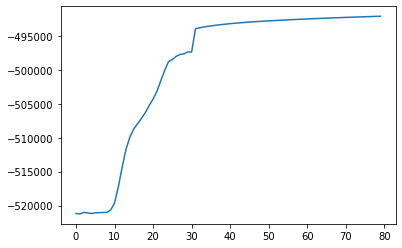

In [5]:
plt.plot(ll)

In [6]:
from evaluate_all_datasets import evaluate_lds

r2,p,a,x = evaluate_lds(b, model)
print(r2)
print(np.corrcoef(np.concatenate(a).flatten(),np.concatenate(p).flatten()))

-20.15362172647255
[[1.         0.21214487]
 [0.21214487 1.        ]]


In [9]:
print(np.corrcoef(np.concatenate(r[:,300:680:20,:]).flatten(),np.concatenate(r[:,280:660:20,:]).flatten())[1,0])

print(np.corrcoef(np.concatenate(r[:,20::20,:]).flatten(),np.concatenate(np.array(p)).flatten())[1,0])

print(np.corrcoef(np.concatenate(r[:,300:700:20,:]).flatten(),np.concatenate(smoothed).flatten())[1,0])

0.9491800267524407
0.9472060178793245
0.24738238573920218


In [10]:
from evaluate_all_datasets import evaluate_lds_difference

r2, p, a, x = evaluate_lds_difference(b, model)
print(r2)
print(np.corrcoef(np.concatenate(a).flatten(), np.concatenate(p).flatten()))

-309.4714788244586
[[1.         0.10643254]
 [0.10643254 1.        ]]


In [12]:
np.linalg.eigvals(model.A)

array([ 1.00021934+0.j        ,  0.93553054+0.31072813j,
        0.93553054-0.31072813j,  0.26531038+0.j        ,
       -0.24208233+0.j        , -0.05294405+0.j        ])

### d_latent = 2

In [ ]:
d_latent = 2
model = DefaultLDS(100, d_latent)

for trial in b: model.add_data(trial)

ll = []
for i in range(30):
    model.resample_model()
    ll.append(model.log_likelihood())
    print("step %d completed"%i)

for i in range(50):
    model.EM_step()
    ll.append(model.log_likelihood())
    print("step %d completed"%i)

In [ ]:
plt.plot(ll)

In [ ]:
from evaluate_all_datasets import evaluate_lds

r2,p,a,x = evaluate_lds(b, model)
r2

In [ ]:
print('autocorrelation of rate, lag 1 bin')
print(np.corrcoef(np.concatenate(r[:,300:680:20,:]).flatten(),np.concatenate(r[:,280:660:20,:]).flatten())[1,0])

print(np.corrcoef(np.concatenate(r[:,20:1000:20,:]).flatten(),np.concatenate(np.array(p)).flatten())[1,0])

print(np.corrcoef(np.concatenate(r[:,300:700:20,:]).flatten(),np.concatenate(smoothed).flatten())[1,0])

In [ ]:
np.linalg.eigvals(model.A)

In [50]:
from scipy.linalg import expm
true_model = DefaultLDS(100,2)
true_model.A = expm(np.array([[-0.625, -20.5],[12.5,-0.625]])*fit_bin)
true_model.sigma_obs = np.eye(true_model.D_obs) * 0.5
true_model.C = W
r2,p,a,x = evaluate_lds(b, true_model)

In [57]:
print(np.corrcoef(np.concatenate(r[:,300:680:20,:]).flatten(),np.concatenate(r[:,280:660:20,:]).flatten())[1,0])

print(np.corrcoef(np.concatenate(r[:,20::20,:]).flatten(),np.concatenate(np.array(p)).flatten())[1,0])

print(np.corrcoef(np.concatenate(r[:,300:700:20,:]).flatten(), np.concatenate(smoothed).flatten())[1,0])

print(np.corrcoef(np.concatenate(b[:,1:,:]).flatten(),np.concatenate(np.array(p)).flatten())[1,0])

0.9491800267524407
-0.021084753980861494
0.24738238573920218
0.019074753357646974


numpy.ndarray

-3781.6551656092283
[[1.         0.04154213]
 [0.04154213 1.        ]]
